<a href="https://colab.research.google.com/github/prabindh/covid2020-predictor/blob/master/Prediction_Covid_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Exercise

Predict the number of cases n-days after from the 1st reported infection.

Use the data available in the below file, provided by JHU CSSE.

https://github.com/prabindh/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [1]:
#import cudf as pd
import pandas as pd

from urllib.request import urlopen
#numbers_csv = urlopen("https://raw.githubusercontent.com/prabindh/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_csv = urlopen("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_df = pd.read_csv(numbers_csv)
numbers_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197


Lets find the details of this dataset.


In [2]:
numbers_df["Country/Region"].describe()

count       266
unique      188
top       China
freq         33
Name: Country/Region, dtype: object

Treating the various provinces, countries as independent features, get only the numeric count for all rows.

In [3]:
count_df = numbers_df.iloc[:, 4:]
count_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197


In [4]:
count_df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,30.954887,37.319549,45.255639,63.109023,74.740602,89.819549,103.890977,115.766917,129.289474,139.548872,150.939850,160.759398,168.428571,170.003759,226.947368,251.447368,259.511278,267.759398,275.406015,282.466165,284.357143,286.454887,288.793233,295.383459,296.834586,298.966165,302.150376,305.812030,310.917293,316.052632,323.184211,332.048872,...,1.745010e+04,1.775176e+04,1.808389e+04,1.844433e+04,1.881865e+04,1.921942e+04,1.962626e+04,2.000384e+04,2.036599e+04,2.069295e+04,2.104968e+04,2.143652e+04,2.188065e+04,2.233811e+04,2.282287e+04,2.322880e+04,2.359115e+04,2.401447e+04,2.450814e+04,2.497313e+04,2.547416e+04,2.594981e+04,2.637496e+04,2.676449e+04,2.722817e+04,2.773058e+04,2.825084e+04,2.873782e+04,2.924391e+04,2.974596e+04,3.020474e+04,3.072910e+04,3.139079e+04,3.191344e+04,3.259520e+04,3.319243e+04,3.368649e+04,3.420542e+04,3.482682e+04,3.545620e+04
std,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,303.897894,360.297287,443.366813,689.035590,832.955314,1026.584113,1209.757050,1359.930297,1534.124062,1665.834681,1820.908541,1949.404601,2049.811698,2050.151419,2958.037971,3337.714499,3450.666329,3569.106027,3679.812144,3783.535150,3804.944354,3830.108981,3843.659791,3930.741302,3930.778990,3943.287848,3973.903253,3998.661733,4024.286714,4044.760228,4072.607986,4109.816417,...,9.768445e+04,9.900382e+04,1.005232e+05,1.020231e+05,1.037028e+05,1.055171e+05,1.073004e+05,1.089116e+05,1.104494e+05,1.118322e+05,1.132985e+05,1.147846e+05,1.166381e+05,1.185936e+05,1.206524e+05,1.222569e+05,1.236122e+05,1.254211e+05,1.272593e+05,1.291817e+05,1.313508e+05,1.333309e+05,1.349130e+05,1.363934e+05,1.382464e+05,1.402889e+05,1.424252e+05,1.445871e+05,1.467117e+05,1.484660e+05,1.502466e+05,1.525569e+05,1.550623e+05,1.573548e+05,1.606058e+05,1.634634e+05,1.655465e+05,1.680109e+05,1.711234e+05,1.743164e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0000

Get the country with maximum numbers the last day of record.


In [5]:
max_count = count_df.iloc[:, -1].max()
max_count

2382327

In [6]:
max_index = count_df['4/2/20'].idxmax()
max_index

225

In [7]:
numbers_df.iloc[max_index]

Province/State        NaN
Country/Region         US
Lat               37.0902
Long             -95.7129
1/22/20                 1
                   ...   
6/20/20           2255297
6/21/20           2281655
6/22/20           2312302
6/23/20           2347491
6/24/20           2382327
Name: 225, Length: 159, dtype: object

In [8]:
usa_data = numbers_df[numbers_df["Country/Region"] == "US"]
usa_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,...,1474127,1493131,1514839,1535337,1558949,1584486,1608623,1630450,1651239,1670209,1689057,1707423,1730259,1754747,1778993,1799122,1816476,1837367,1857248,1878543,1903854,1926538,1944309,1961781,1979868,2000702,2023590,2048986,2074526,2094058,2114026,2137731,2163290,2191052,2222579,2255297,2281655,2312302,2347491,2382327


In [9]:
china_data = numbers_df[numbers_df["Country/Region"] == "China"]
china_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,594,594,594,594,594,594,594,594,595,601,637,673,700,731,752,777,777,821,830,843,850,863
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,580,582,582,582,582,582,582,582,582,582,582,582
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,356,356,356,356,356,356,356,356,356,357,357,358,358,358,358,358,358,358,358,358,358,359,359,359,359,360,361,361,361,362,362,362,362,362,362,363,363,363,363,363
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,149,150,151,151,151,151,158,158,161
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,1590,1590,1590,1590,1590,1590,1591,1592,1592,1592,1592,1592,1592,1593,1593,1595,1596,1597,1598,1598,1601,1602,1602,1604,1604,1607,1607,1608,1625,1625,1628,1628,1628,1631,1631,1634,1634,1634,1634,1635
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,170,170,170,170,170,170,171,171,171,171,171,171,171,171,171,171,171,171,171
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,331,335,336,338,340,340,344,346,346,348,349


How does India fare ?

In [10]:
india_data = numbers_df[numbers_df["Country/Region"] == "India"]
india_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,90648,95698,100328,106475,112028,118226,124794,131423,138536,144950,150793,158086,165386,173491,181827,190609,198370,207191,216824,226713,236184,246622,257486,265928,276146,286605,297535,308993,320922,332424,343091,354065,366946,380532,395048,410451,425282,440215,456183,473105


## Visualisation of the rates

In [11]:
# Take only the numerical values
counts = india_data.iloc[0:1, range(4, len(india_data.columns))]

startCol = 0
for columnName in counts:
  if counts[columnName].values > 0:
    break
  startCol = startCol + 1
counts = counts.iloc[0:1, range(startCol, len(counts.columns))]

counts

,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20
131,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,5,28,30,31,34,39,43,...,90648,95698,100328,106475,112028,118226,124794,131423,138536,144950,150793,158086,165386,173491,181827,190609,198370,207191,216824,226713,236184,246622,257486,265928,276146,286605,297535,308993,320922,332424,343091,354065,366946,380532,395048,410451,425282,440215,456183,473105


## Converting to np array

In [12]:
counts_np = counts.to_numpy()

In [13]:
counts_np.shape

(1, 147)

In [14]:
import numpy as np
counts_np = np.squeeze(counts_np)

In [15]:
import numpy as np
counts_np

array([     1,      1,      1,      2,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            5,      5,     28,     30,     31,     34,     39,     43,
           56,     62,     73,     82,    102,    113,    119,    142,
          156,    194,    244,    330,    396,    499,    536,    657,
          727,    887,    987,   1024,   1251,   1397,   1998,   2543,
         2567,   3082,   3588,   4778,   5311,   5916,   6725,   7598,
         8446,   9205,  10453,  11487,  12322,  13430,  14352,  15722,
        17615,  18539,  20080,  21370,  23077,  24530,  26283,  27890,
        29451,  31324,  33062,  34863,  37257,  39699,  42505,  46437,
        49400,  52987,  56351,  59695,  62808,  67161,  70768,  74292,
        78055,  81997,  85784,  90648,  95698, 100328, 106475, 112028,
      

## Visualisation of the data

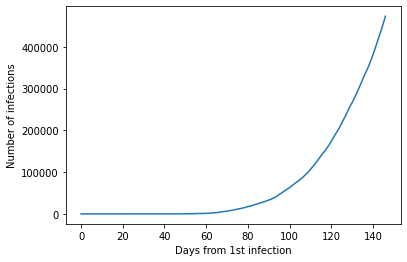

In [16]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,counts_np.shape[0])),counts_np)
plt.xlabel("Days from 1st infection") 
plt.ylabel("Number of infections") 
plt.show()


## Formulate the data-set


In [17]:
x_days = np.array(list(range(0, len(counts_np))))
x_days

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146])

In [18]:
y_infections_india = counts_np
y_infections_india

array([     1,      1,      1,      2,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,      3,      3,
            5,      5,     28,     30,     31,     34,     39,     43,
           56,     62,     73,     82,    102,    113,    119,    142,
          156,    194,    244,    330,    396,    499,    536,    657,
          727,    887,    987,   1024,   1251,   1397,   1998,   2543,
         2567,   3082,   3588,   4778,   5311,   5916,   6725,   7598,
         8446,   9205,  10453,  11487,  12322,  13430,  14352,  15722,
        17615,  18539,  20080,  21370,  23077,  24530,  26283,  27890,
        29451,  31324,  33062,  34863,  37257,  39699,  42505,  46437,
        49400,  52987,  56351,  59695,  62808,  67161,  70768,  74292,
        78055,  81997,  85784,  90648,  95698, 100328, 106475, 112028,
      

## Obtaining data for any country

Note the changes, to add up all provinces/regions within a country, if found. For example, there are more than one regions in China.

In [19]:
def get_covidian_count(country_name):
  country_data = numbers_df[numbers_df["Country/Region"] == country_name]
  rows = country_data.shape[0]
  counts = country_data.iloc[0:rows, range(4, len(country_data.columns))]
  counts = counts.sum()
  startCol = 0
  for column in counts:
    if column > 0:
      break
    startCol = startCol + 1
  counts = counts.iloc[range(startCol, len(counts))]
  np_arr = np.squeeze(counts.to_numpy())
  x_days = np.array(list(range(0, len(np_arr))))
  return np.array([x_days, np_arr])



In [20]:
infections_usa = get_covidian_count("US")
infections_india = get_covidian_count("India")
infections_china = get_covidian_count("China")
infections_india

array([[     0,      1,      2,      3,      4,      5,      6,      7,
             8,      9,     10,     11,     12,     13,     14,     15,
            16,     17,     18,     19,     20,     21,     22,     23,
            24,     25,     26,     27,     28,     29,     30,     31,
            32,     33,     34,     35,     36,     37,     38,     39,
            40,     41,     42,     43,     44,     45,     46,     47,
            48,     49,     50,     51,     52,     53,     54,     55,
            56,     57,     58,     59,     60,     61,     62,     63,
            64,     65,     66,     67,     68,     69,     70,     71,
            72,     73,     74,     75,     76,     77,     78,     79,
            80,     81,     82,     83,     84,     85,     86,     87,
            88,     89,     90,     91,     92,     93,     94,     95,
            96,     97,     98,     99,    100,    101,    102,    103,
           104,    105,    106,    107,    108,    109,    110, 

In [21]:
np.savetxt("usa.csv",  np.transpose([infections_usa[0],infections_usa[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("india.csv",  np.transpose([infections_india[0],infections_india[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("china.csv",  np.transpose([infections_china[0],infections_china[1]]), fmt="%d,%d", header="Days, Count")

To confirm the data is proper, load the data back and check.

In [22]:
test_np = np.loadtxt("usa.csv", delimiter=',', skiprows=1, dtype='int,int')
test_np

array([(  0,       1), (  1,       1), (  2,       2), (  3,       2),
       (  4,       5), (  5,       5), (  6,       5), (  7,       5),
       (  8,       5), (  9,       7), ( 10,       8), ( 11,       8),
       ( 12,      11), ( 13,      11), ( 14,      11), ( 15,      11),
       ( 16,      11), ( 17,      11), ( 18,      11), ( 19,      11),
       ( 20,      12), ( 21,      12), ( 22,      13), ( 23,      13),
       ( 24,      13), ( 25,      13), ( 26,      13), ( 27,      13),
       ( 28,      13), ( 29,      13), ( 30,      15), ( 31,      15),
       ( 32,      15), ( 33,      15), ( 34,      15), ( 35,      15),
       ( 36,      16), ( 37,      16), ( 38,      24), ( 39,      30),
       ( 40,      53), ( 41,      73), ( 42,     104), ( 43,     174),
       ( 44,     222), ( 45,     337), ( 46,     451), ( 47,     519),
       ( 48,     711), ( 49,    1109), ( 50,    1561), ( 51,    2157),
       ( 52,    2870), ( 53,    2968), ( 54,    4360), ( 55,    6141),
      

## Given x, predict y

#### Kaggle
Note - this notebook is also available as a Kaggle kernel, at
https://www.kaggle.com/prabindh/kernel5f31471257

#### References
1. https://pypi.org/project/fbprophet

2. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
